# 07.1 Редукция графов

<div style="text-align: right"> 
    
    Лекция 7.1 19/03/21 
    
    Кубенский Александр Александрович
    
    akoubensky@gmail.com
</div> 

Будем исходить из представления программ в виде структур данных расширенного лямбда-исчисления. Наша основная задача – корректно представить концепцию разделения переменных.

1. Константа `c`

2. Примитивная функция `f` (константная функция) - представляем узлом

3. Лямбда-выражение $\lambda x.E$ - слева - ссылка на переменную, справа - ссылка на тело выражения

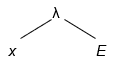

4. Применение функции $E_1 \ E_2$ - $E_1$ применяется к $E_2$ - $E_1$ - функция, $E_2$ - аргумент

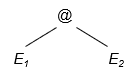

5. Применение конструктора `C x y z`

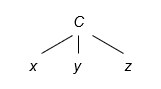

## Представление лямбда-выражений в виде графов

Частичное применение примитивных функций и конструкторов:

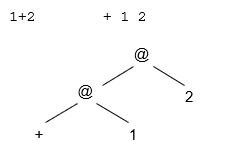
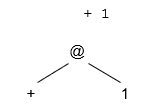

Применение конструктора `:`:

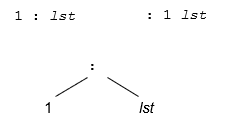

Но при частичном применении получается функция:

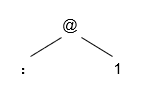

Функция - лямбда выражение:

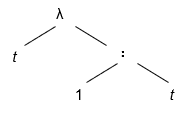

## Имена выражений

Вводятся два типа блоков (расширение лямбда-исчислений):

1. `let x = E1 in E2` - после того, как локальное обозначение введено - есть выражение E2, в котором исползуется `x`.

2. `letrec x1 = E1; ... xk = Ek in E` - рекурсивное обращение.

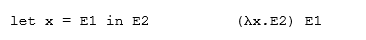

Вводим функцию x и телом E2, а потом применяем к E1 - сопоставляем x E1 и вычисляем к E2:

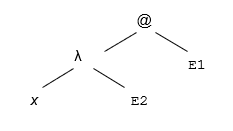

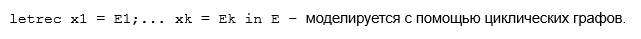

## Пример представления выражения в виде графа

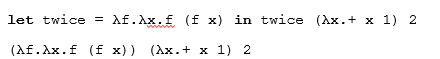

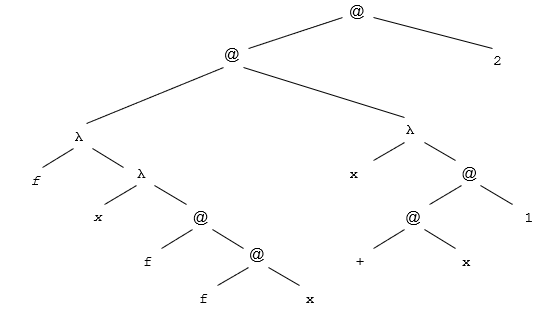

## Правила редукции графа

Пусть есть граф, в котором мы увеличиваем на единицу двойку
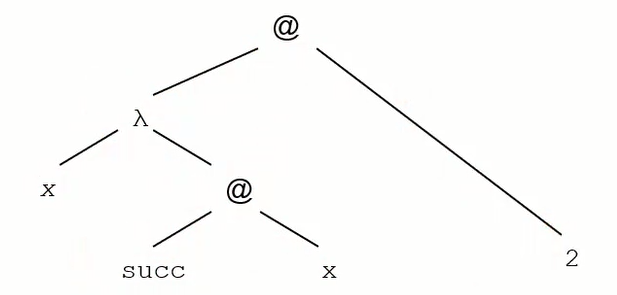

1. Сначала мы ищем самый левый из самых внешних редексов по *левому гребню графа* (нашли $\lambda$ перед функцией применить $@$)

2. Копируем тела лямбда-выражения

3. Подстановка аргумента вместо свободных вхождений переменной лямбда-выражения в тело:

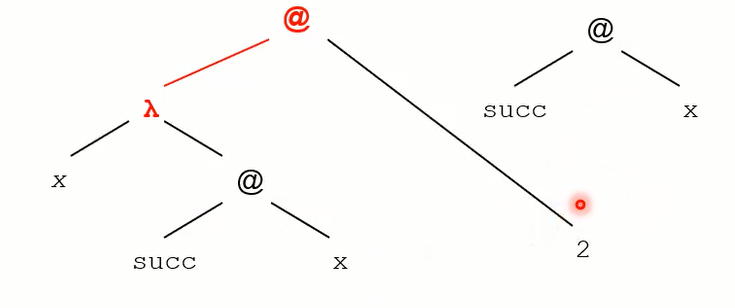

Делаем ссылку на фактический аргумент

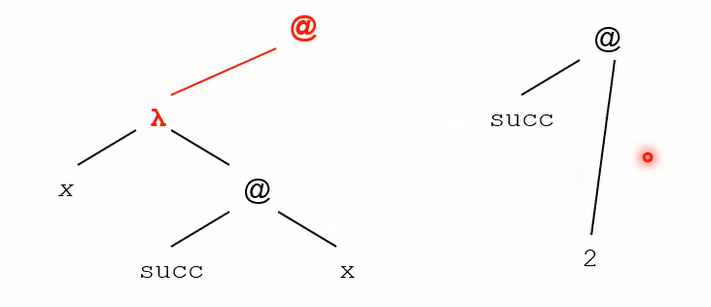

4. Подставляем получившуюся копию на данное место - замещаем в дереве $@$ узла результатом вычислений

5. Собираем мусор:

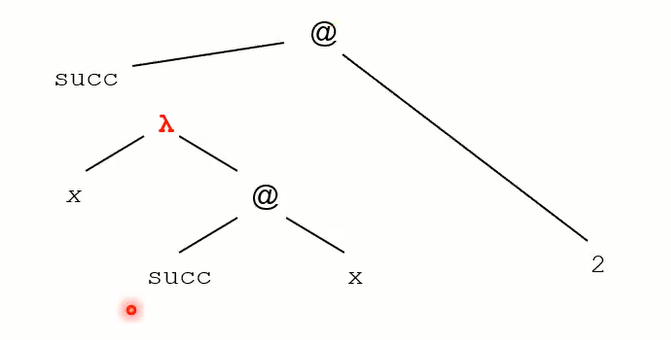

Некоторые особенности данной процедуры:

1. Тело лямбда-выражения копируется, чтобы его можно было переиспользовать; «мусор» удаляется

2. Подстановка аргументов производится с помощью установки ссылок; тем самым производится эффективное разделение переменных

3. Результат редукции замещает редуцируемое выражение, тем самым все ссылки на этот результат будут иметь новое значение

Пример редукции графов.

1. Осуществляем разделение переменных - при подстановке аргументов осуществляется ссылка на аргумент;

2. Если аргумент сложный, то будем вычислять один раз

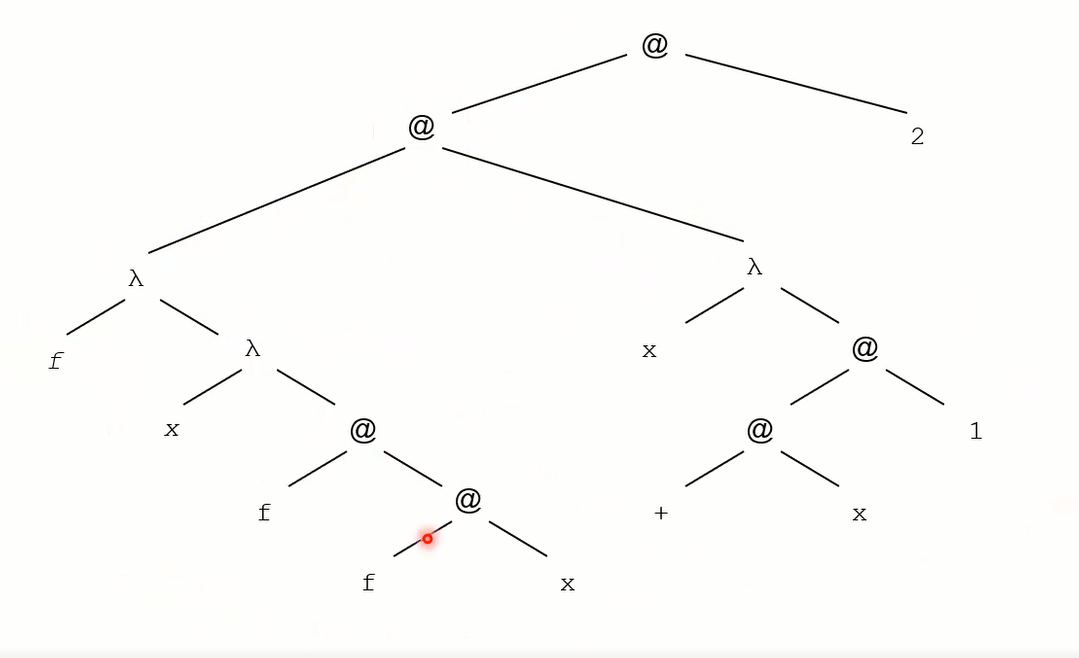

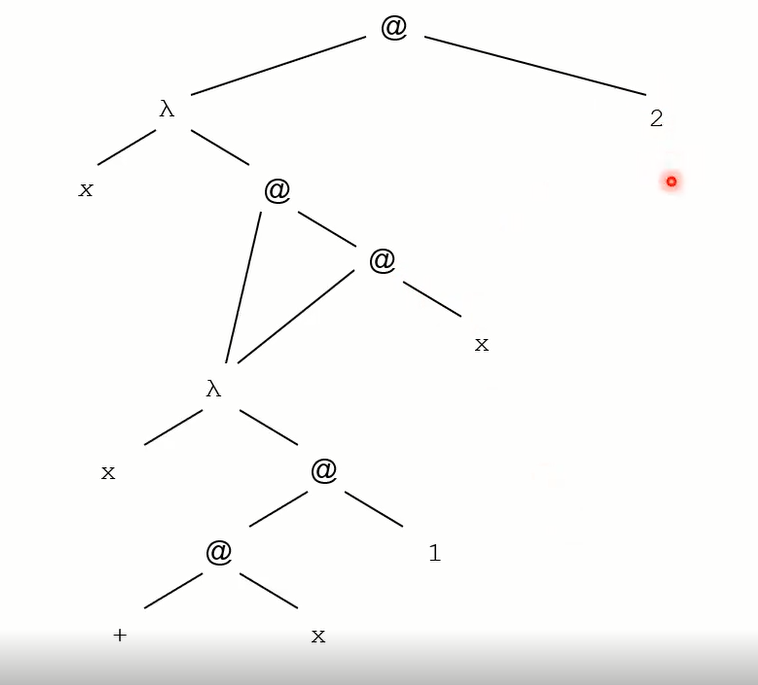

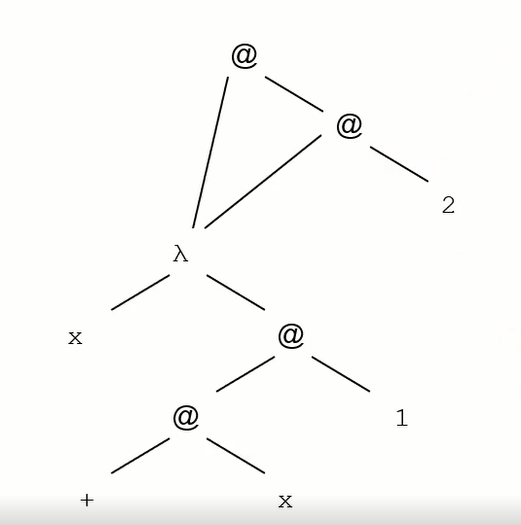

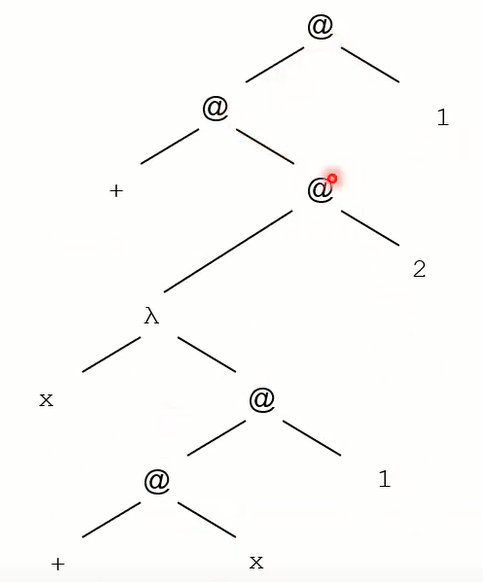

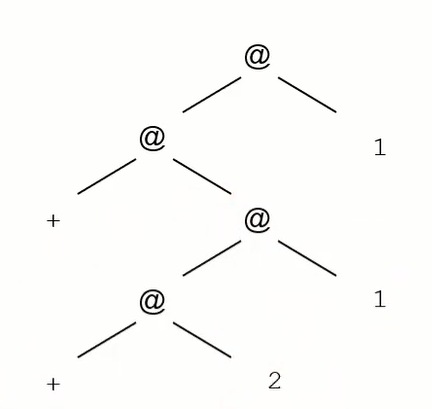

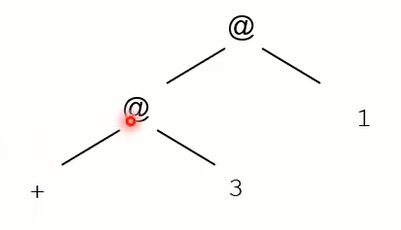

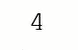

## $\delta$-редукция в графовом представлении

Если при переходе по левому гребню находим константу, то это - примитивная функция:

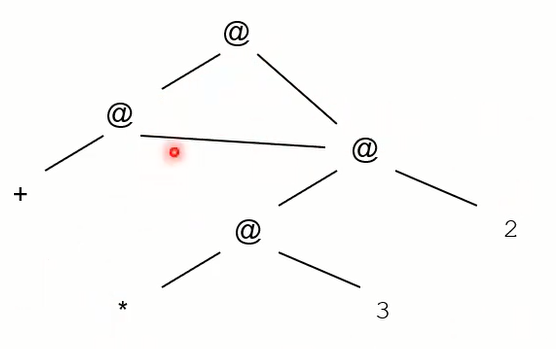

Обе переменных ссылаются на + 

1. Сначала выполняем редцкию для всех **строгих** аргументов

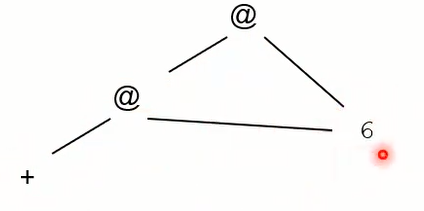

2. И первый и второй аргумент уже находятся в СЗНФ - это просто числа и выполняем сложение - формируем результат в соответствии с правилами примитивной функции:

3. Результат замещает собой корень редекса

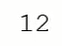

## Общий алгоритм редукции графов (пока без учета рекурсии)

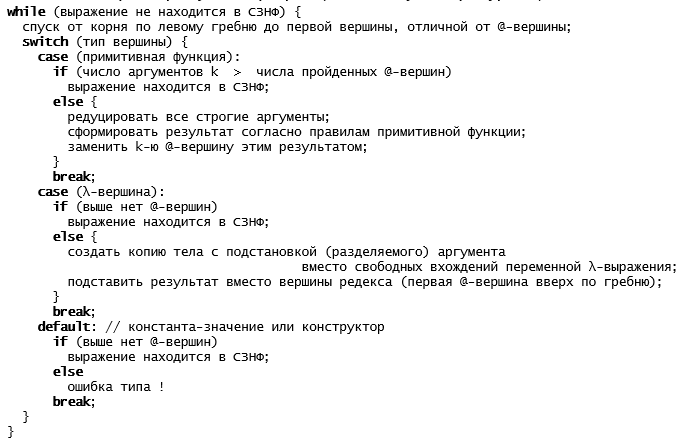

## Использование вершин-синонимов

При выполнении редукций есть одна проблема, связанная с копированием: в теле функции переменная может быть в корне. Тогда вместо подстановки ссылки на аргумент придется делать копию вершины, представляющей аргумент.

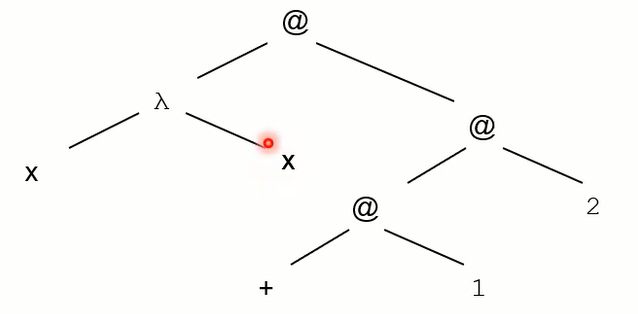

1-ый вариант - результатом будет новая вершина, новая копия:

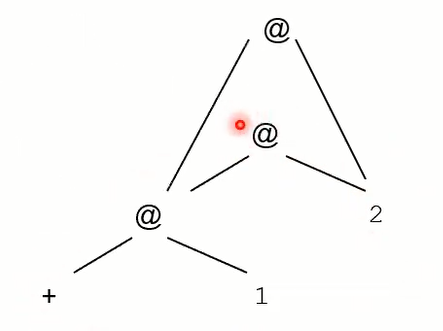

2-ой вариант - сделать специальную вершину *синоним* - эта вершина, которая представляет то, на что она ссылается.

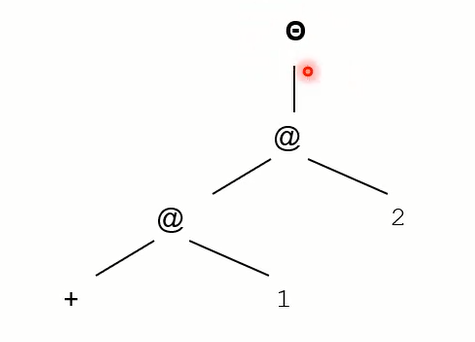

Можно вместо копирования вершины создавать «вершину-синоним» - «прозрачную» по ссылкам.

При прохождении вершины-синонима можно оптимизировать их количество, убирать двойные синонимы, заменять ссылки на синоним ссылками на саму вершину.

Аналогичная проблема возникает при применении примитивных функций-селекторов, которые не преобразуют, а просто выдают аргумент или его часть (например, head или tail).



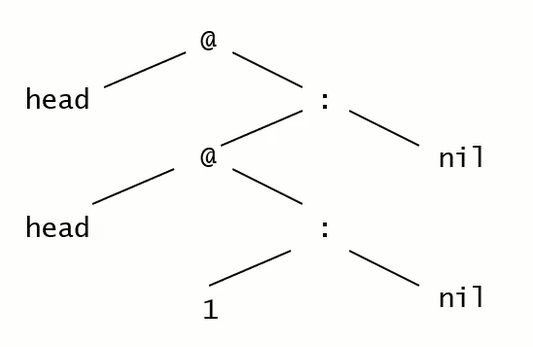

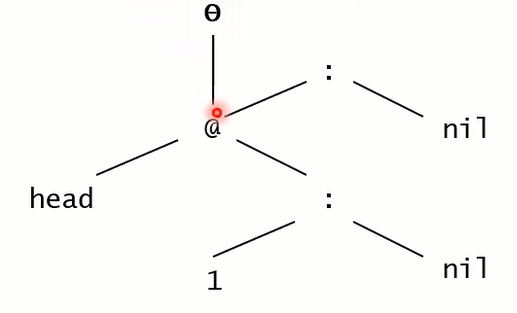

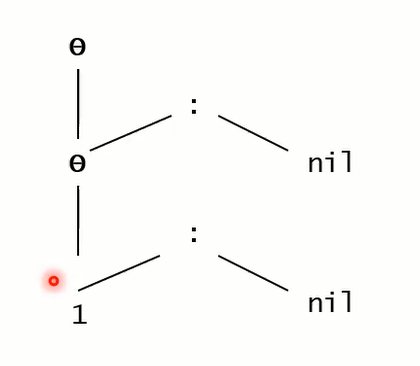

Пройдя по прозрачным $\theta$ получим результат - единица.